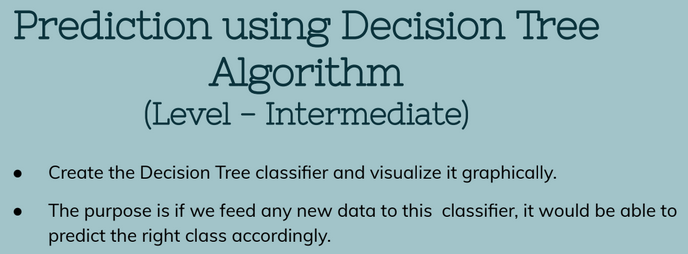

#### AUTHOR - Sruthi Sudheer

##### Importing initially required libraries

In [1]:
import pandas as pd
import numpy as np

##### Reading Data

In [2]:
data='Iris.csv'
df=pd.read_csv(data)  # Reading and creating pandas dataframe

##### Displaying the first five rows of the data

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


So, there are five columns available in the dataset.'Species' is the target variable.(Supervised ML)

Dropping the column 'Id' to avoid confusion of serial index.

In [4]:
df.drop(['Id'],axis=1,inplace=True)

In [5]:
df.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


##### Number of (Rows,Columns) in the dataframe

In [6]:
df.shape

(150, 5)

The dataframe has 150 rows and 6 columns.

##### Column data types

In [7]:
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

The five columns are of continuous nature. The output variable 'Species' is 'categorical', the problem is a Classification problem.

##### Checking for missing values

In [8]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There are no missing values in the data.

##### Checking for duplicate rows

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(147, 5)

There are no duplicate values in the dataset.

> ##### Univariate Analysis

##### Descriptive Statistical summary of the two columns

In [11]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


The mean, standard deviation, max, min values of the continuous features can be seen in the above result.

#### Label Encoding

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])

Since, the machine cannot interpret features that are strings(object dtype); label encoding is to be done.

In [14]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


##### Importing library for data visualization

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

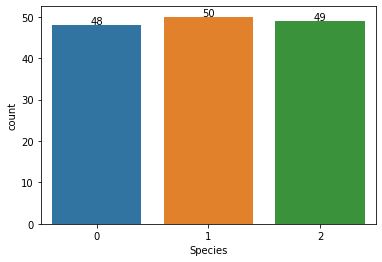

In [16]:
total = len(df)*1
graph=sns.countplot(df['Species'])
i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,df['Species'].value_counts()[i],ha="center")
    i += 1

Each of the three categories has got these number of rows as seen in the above countplot. 

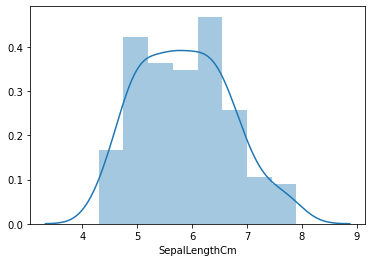

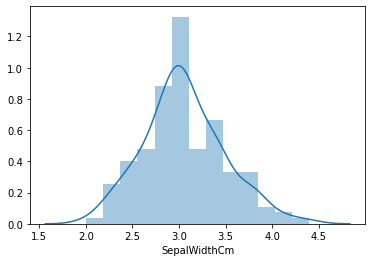

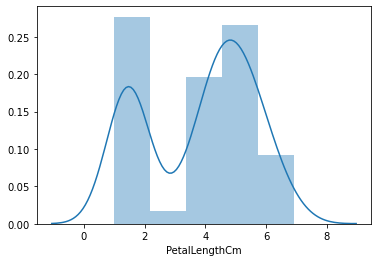

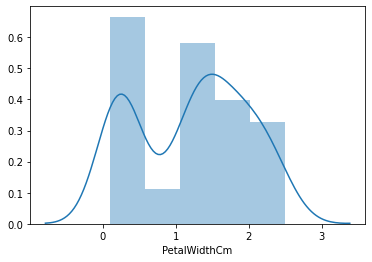

In [17]:
for i in range(4):
    plt.figure()
    sns.distplot(df.iloc[:,i])

The above plots depict the variations in the different continuous columns.
The data distributions are visualized.

> ##### Multivariate Analysis

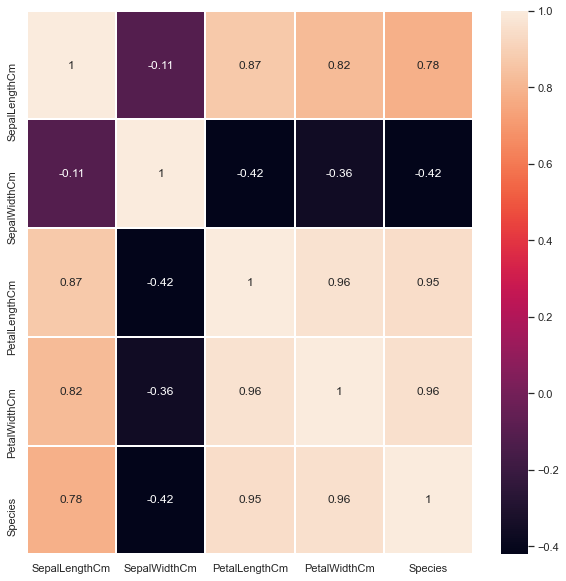

In [18]:
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(df.corr(),linewidths=1,annot=True)

Based on the heatmap above, it can be inferred that the category 'Species' is more dependent on the predictor variables of 'PetalLengthCm' and 'PetalWidthCm' (due to high postive correlation of 0.95,0.96).

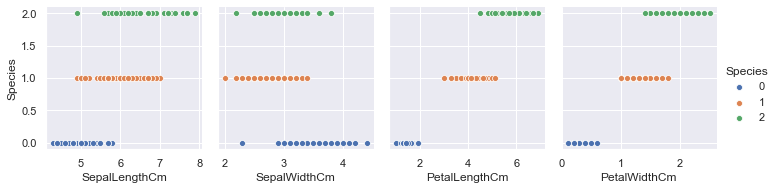

In [19]:
sns.pairplot(data=df,y_vars=['Species'],x_vars=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],hue='Species')

The pairplot above helps in understanding how the categories (of 'Species') is changing with respect to the predictor variables.

Considering all the four predictor variables for learning:

##### Separating the target variable from the predictor variable.

In [20]:
x_df=df.drop('Species',axis=1)
y_df=df['Species']

##### Splitting the dataset into train and test data

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
trainX, testX, trainY, testY = train_test_split(x_df,y_df,test_size=0.3,random_state=100)
# train data=70%, test data=30%

##### Decision Tree Classifier

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
dtclf=DecisionTreeClassifier(random_state=0) 

In [25]:
dtclf.fit(trainX,trainY)

DecisionTreeClassifier(random_state=0)

In [26]:
preds=dtclf.predict(testX)
preds

array([2, 0, 2, 2, 0, 1, 2, 2, 0, 2, 2, 1, 0, 2, 0, 2, 2, 1, 2, 1, 0, 1,
       2, 1, 0, 2, 0, 0, 1, 1, 2, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 2,
       2])

In [27]:
results = pd.DataFrame({'Actual': testY, 'Predicted': preds})  
results.head()

,Actual,Predicted
114,2,2
15,0,0
112,2,2
120,2,2
11,0,0


In [28]:
from sklearn import metrics  
print('Accuracy:', metrics.accuracy_score(testY, preds)) 

Accuracy: 0.9555555555555556


An accuracy score of 95.55% is obtained for this model.

##### Visualizing the Decision Tree

In [29]:
from sklearn import tree

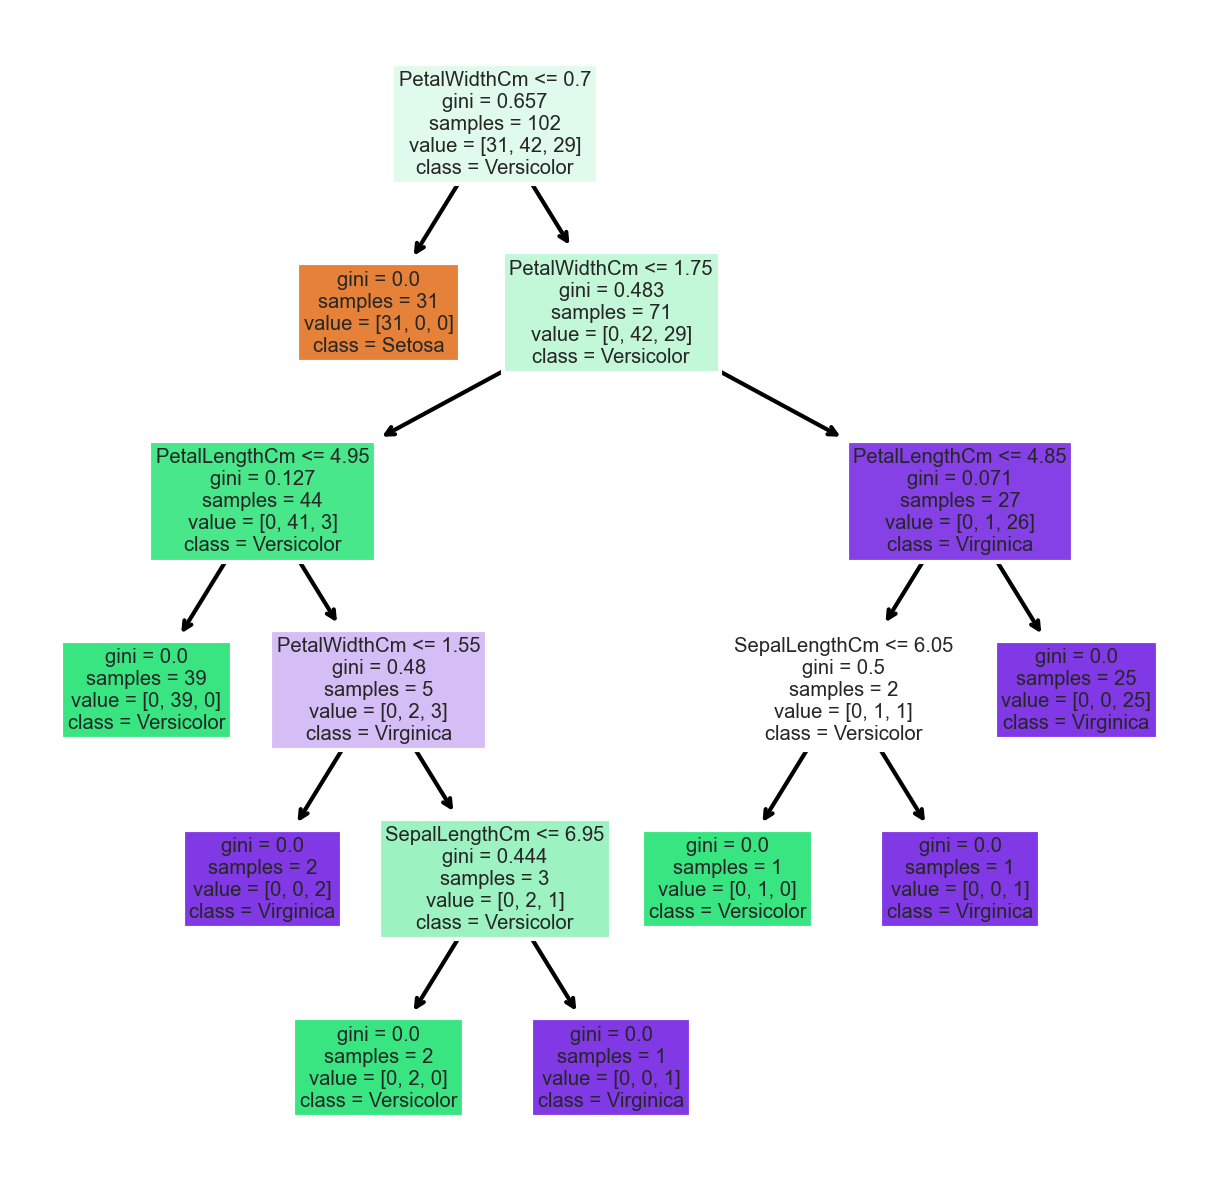

In [30]:
fn=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
cn=['Setosa','Versicolor','Virginica']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (5,5), dpi = 300)
tPlot=tree.plot_tree(dtclf, feature_names = fn, class_names = cn, filled = True);

for o in tPlot:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)

Considering only two features of 'PetalLengthCm' and 'PetalWidthCm' since these two features showed high correlation with the target variable 'Species'.

##### Separating the target variable from the predictor variable.

In [31]:
x_df2=df.drop(['Species','SepalLengthCm','SepalWidthCm'],axis=1)
y_df2=df['Species']

In [32]:
x_df2.head(2)

,PetalLengthCm,PetalWidthCm
0,1.4,0.2
1,1.4,0.2


##### Splitting the dataset into train and test data

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
trainX2, testX2, trainY2, testY2 = train_test_split(x_df2,y_df2,test_size=0.3,random_state=100)
# train data=70%, test data=30%

##### Decision Tree Classifier

There are a number of hyperparameters available for the DecisionTreeClassifier() which can be tuned as necessary to avoid issues like overfitting.

In [35]:
dtclf2=DecisionTreeClassifier(random_state=0,max_depth=5,min_samples_leaf=3) 

> max_depth :int, default=None

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

In this case, I've assigned the max_depth to 5.


> min_samples_leaf:int or float, default=1

The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches.

In this case, min_samples_leaf is assigned to 3.

In [36]:
dtclf2.fit(trainX2,trainY2)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3, random_state=0)

In [37]:
preds2=dtclf2.predict(testX2)
preds2

array([2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 1, 0, 2, 0, 2, 2, 1, 2, 1, 0, 1,
       2, 1, 0, 2, 0, 0, 1, 1, 2, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 2,
       2])

In [38]:
results = pd.DataFrame({'Actual': testY2, 'Predicted': preds2})  
results.head()

,Actual,Predicted
114,2,2
15,0,0
112,2,2
120,2,2
11,0,0


In [39]:
print('Accuracy:', metrics.accuracy_score(testY2, preds2)) 

Accuracy: 0.9777777777777777


An accuracy score of 97.77% is obtained for this model with slight tuning of the hyperparameters.

##### Visualizing the Decision Tree

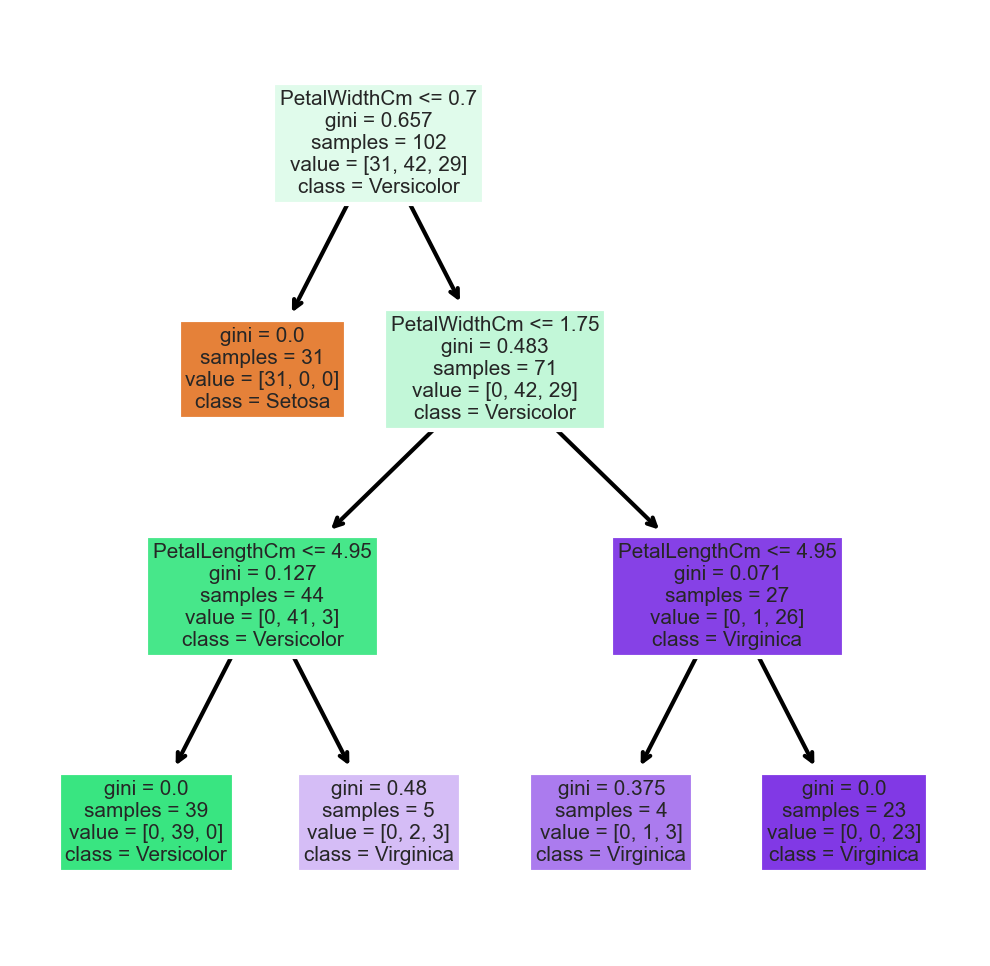

In [40]:
fn=['PetalLengthCm','PetalWidthCm']
cn=['Setosa','Versicolor','Virginica']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)
tPlot=tree.plot_tree(dtclf2, feature_names = fn, class_names = cn, filled = True);

for o in tPlot:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)